# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
if len(cities) >= 500:
    print("We have >= 500 unique (non-repeat) cities")
else:
    print("WARNING! We have less than 500 unique (non-repeat) cities")
    
df_city = pd.DataFrame(cities, columns = ['City'])

df_city['Cloudiness'] = ""
df_city['Country'] = ""
df_city['Date'] = ""
df_city['Humidity'] = ""
df_city['Lat'] = ""
df_city['Lng'] = ""
df_city['Max Temp'] = ""
df_city['Wind Speed'] = ""

611
We have >= 500 unique (non-repeat) cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval")
print("-----------------------------")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

for index, row in df_city.iterrows():
    
    city = row['City']
    print(f"Processing Record {index} | {city}")
    try:        
        response = requests.get(query_url + city).json()
        #just b/c it's in Example
#        print(query_url + city)
        df_city.loc[index, 'Cloudiness'] = response['clouds']['all']
        df_city.loc[index, 'Country'] = response['sys']['country']
        df_city.loc[index, 'Date'] = response['dt']
        df_city.loc[index, 'Humidity'] = response['main']['humidity']
        df_city.loc[index, 'Lat'] = response['coord']['lat']
        df_city.loc[index, 'Lng'] = response['coord']['lon']
        df_city.loc[index, 'Max Temp'] = response['main']['temp_max']
        df_city.loc[index, 'Wind Speed'] = response['wind']['speed']

    except KeyError:
        print("Can't find data for city: {city} ... skipping.")
        
df = df_city[df_city['Date'] != ""]
if len(df) >= 500:
    print("After filtering, we still have sufficient numbers of data (>=500)")
else:
    print("WARNING! After filtering, We have less than 500 unique (non-repeat) rows of data")


Beginning Data Retrieval
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=94955054932359d42ef94f7a7f8879b2&units=Imperial&q=
Processing Record 0 | port augusta
Processing Record 1 | saint-philippe
Processing Record 2 | butaritari
Processing Record 3 | mahadday weyne
Can't find data for city: {city} ... skipping.
Processing Record 4 | atuona
Processing Record 5 | bozoum
Processing Record 6 | iqaluit
Processing Record 7 | hilo
Processing Record 8 | nagahama
Processing Record 9 | kingisepp
Processing Record 10 | provideniya
Processing Record 11 | port alfred
Processing Record 12 | russell
Processing Record 13 | bredasdorp
Processing Record 14 | kirakira
Processing Record 15 | hobart
Processing Record 16 | rikitea
Processing Record 17 | sisimiut
Processing Record 18 | albany
Processing Record 19 | bilibino
Processing Record 20 | sri aman
Processing Record 21 | faanui
Processing Record 22 | tiksi
Processing Record 23 | alugan
Processing Record 24 | bambous 

Processing Record 207 | darnah
Processing Record 208 | arraial do cabo
Processing Record 209 | meulaboh
Processing Record 210 | margate
Processing Record 211 | buin
Processing Record 212 | kavaratti
Processing Record 213 | yumen
Processing Record 214 | benjamin hill
Processing Record 215 | castro
Processing Record 216 | dudinka
Processing Record 217 | muisne
Processing Record 218 | townsville
Processing Record 219 | andenes
Can't find data for city: {city} ... skipping.
Processing Record 220 | kodinsk
Processing Record 221 | narsaq
Processing Record 222 | petropavlovsk-kamchatskiy
Processing Record 223 | vostok
Processing Record 224 | alta floresta
Processing Record 225 | mikhaylovka
Processing Record 226 | kharan
Processing Record 227 | iraucuba
Processing Record 228 | buhovo
Processing Record 229 | bacolod
Processing Record 230 | cayenne
Processing Record 231 | fougamou
Processing Record 232 | klyuchi
Processing Record 233 | waynesville
Processing Record 234 | muyezerskiy
Processing 

Can't find data for city: {city} ... skipping.
Processing Record 423 | te anau
Processing Record 424 | khani
Processing Record 425 | port-gentil
Processing Record 426 | passo de camaragibe
Processing Record 427 | waipawa
Processing Record 428 | flinders
Processing Record 429 | kalabo
Processing Record 430 | maraa
Processing Record 431 | emerald
Processing Record 432 | anadyr
Processing Record 433 | umm kaddadah
Processing Record 434 | brainerd
Processing Record 435 | san ramon
Processing Record 436 | barentu
Processing Record 437 | mercedes
Processing Record 438 | moses lake
Processing Record 439 | kismayo
Can't find data for city: {city} ... skipping.
Processing Record 440 | chiredzi
Processing Record 441 | chimbote
Processing Record 442 | tautira
Processing Record 443 | primorsk
Processing Record 444 | puerto del rosario
Processing Record 445 | luderitz
Processing Record 446 | mendeleyevsk
Processing Record 447 | jizan
Processing Record 448 | tarragona
Processing Record 449 | mahaico

In [4]:
unix_timestamp  = int(df['Date'][0])
local_time = time.localtime(unix_timestamp)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df.to_csv('weather_data.csv')

In [6]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port augusta,40,AU,1553386110,88,-32.49,137.76,72,4.7
1,saint-philippe,1,CA,1553385912,54,45.36,-73.48,32,19.46
2,butaritari,76,KI,1553386113,100,3.07,172.79,80.08,8.75
4,atuona,64,PF,1553385988,99,-9.8,-139.03,82.6,16.69
5,bozoum,0,CF,1553386584,56,6.31,16.38,76.75,12.44


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

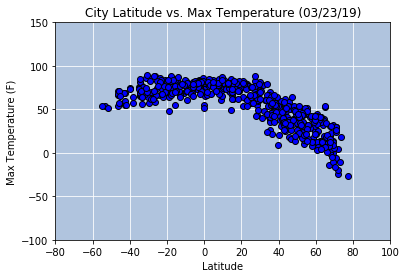

In [7]:
plt.scatter(df['Lat'], df['Max Temp'], color='blue', edgecolors = 'black', zorder = 3)
plt.grid(color = 'white', zorder = 0)
plt.xlim(-80, 100)
plt.ylim(-100, 150)

#"get current axes"
ax = plt.gca()
ax.set_facecolor('lightsteelblue')

plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig('Lat_vs_Temp.png', bbox_inches = "tight")

plt.show()

#### Latitude vs. Humidity Plot

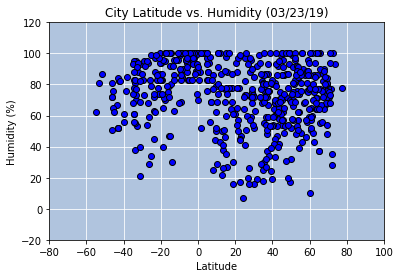

In [8]:
plt.scatter(df['Lat'], df['Humidity'], color='blue', edgecolors = 'black', zorder = 3)
plt.grid(color = 'white', zorder = 0)
plt.xlim(-80, 100)
plt.ylim(-20, 120)

#"get current axes"
ax = plt.gca()
ax.set_facecolor('lightsteelblue')

plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('Lat_vs_Humid.png', bbox_inches = "tight")

plt.show()

#### Latitude vs. Cloudiness Plot

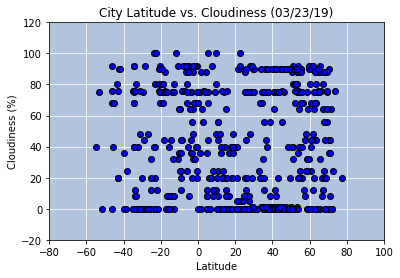

In [9]:
plt.scatter(df['Lat'], df['Cloudiness'], color='blue', edgecolors = 'black', zorder = 3)
plt.grid(color = 'white', zorder = 0)
plt.xlim(-80, 100)
plt.ylim(-20, 120)

#"get current axes"
ax = plt.gca()
ax.set_facecolor('lightsteelblue')

plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('Lat_vs_Cloud.png', bbox_inches = "tight")

plt.show()

#### Latitude vs. Wind Speed Plot

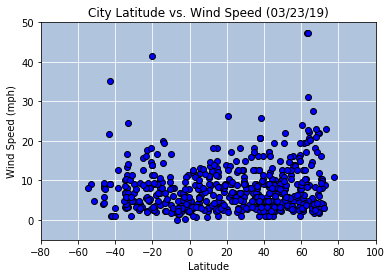

In [10]:
plt.scatter(df['Lat'], df['Wind Speed'], color='blue', edgecolors = 'black', zorder = 3)
plt.grid(color = 'white', zorder = 0)
plt.xlim(-80, 100)
plt.ylim(-5, 50)

#"get current axes"
ax = plt.gca()
ax.set_facecolor('lightsteelblue')

plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('Lat_vs_Wind.png', bbox_inches = "tight")

plt.show()